In [1]:
## What we will cover today?
## Numerical Instability in Programs (why it's important to know)?
## Two examples of numerical instability: Softmax, F1Score (Dice Score)

## Exploring the nn Module
## torch.eye, torch.ones, torch.zeros etc
## Dropout and 1/(1-p)
## MaxPool
## conv1D and np.convolve ? (which one is correct)
## BatchNorm (only the very basics, no talk on running mean , shift and scale for now)
## Class way of doing dropout , maxpool and BatchNorm
## nn.Linear is just dot product

## We will discuss in detail but please do a small research on these 4
## Many losses: which one to pick (in classification, BCEwithLogitsLoss, CrossEntropyLoss)
## NLLLoss and BCELoss (don't use them)


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from matplotlib import pyplot as plt

In [29]:
## sigmoid and softmax
## Hardmax????

t1 = torch.tensor([[1.0,2.1,3.2], 
                   [3.2, 4.2, 5.65],
                   [3.6, 7.3, 1.2],
                   [1.2, 1.65, 4.2]])

t2 = torch.tensor([[100.0,200.1,30.2], 
                   [3.2, 4.2, 5.65],
                   [3.6, 7.3, 1.2],
                   [1.2, 1.65, 4.2]])

In [36]:
torch.exp(t1.max(dim=1).values)

tensor([  24.5325,  284.2915, 1480.3002,   66.6863])

In [17]:
## row
## sample
## observations
## Feature Vector
## Feature Vector != Column

In [14]:
t1

tensor([[1.0000, 2.1000, 3.2000],
        [3.2000, 4.2000, 5.6500],
        [3.6000, 7.3000, 1.2000],
        [1.2000, 1.6500, 4.2000]])

In [16]:
t1.shape

torch.Size([4, 3])

In [15]:
s = nn.Softmax(dim=1)

In [9]:
type(s)

torch.nn.modules.activation.Softmax

In [18]:
s(t1)

tensor([[0.0768, 0.2306, 0.6927],
        [0.0653, 0.1776, 0.7571],
        [0.0241, 0.9737, 0.0022],
        [0.0441, 0.0692, 0.8866]])

In [19]:
t1[0]

tensor([1.0000, 2.1000, 3.2000])

In [21]:
iexp = torch.exp(t1[0])

In [22]:
tot_exp = iexp.sum()

In [23]:
iexp/tot_exp

tensor([0.0768, 0.2306, 0.6927])

In [37]:
def my_softmax(arr):
    iexp = torch.exp(arr - arr.max())
    tot_exp = iexp.sum()
    return iexp/tot_exp

In [26]:
my_softmax(t1[0])

tensor([0.0768, 0.2306, 0.6927])

In [27]:
[my_softmax(i) for i in t1]

[tensor([0.0768, 0.2306, 0.6927]),
 tensor([0.0653, 0.1776, 0.7571]),
 tensor([0.0241, 0.9737, 0.0022]),
 tensor([0.0441, 0.0692, 0.8866])]

In [28]:
s(t1)

tensor([[0.0768, 0.2306, 0.6927],
        [0.0653, 0.1776, 0.7571],
        [0.0241, 0.9737, 0.0022],
        [0.0441, 0.0692, 0.8866]])

In [30]:
s(t2)

tensor([[3.3631e-44, 1.0000e+00, 0.0000e+00],
        [6.5331e-02, 1.7759e-01, 7.5708e-01],
        [2.4074e-02, 9.7374e-01, 2.1840e-03],
        [4.4143e-02, 6.9229e-02, 8.8663e-01]])

In [38]:
my_softmax(t2[0])

tensor([3.3631e-44, 1.0000e+00, 0.0000e+00])

In [ ]:
## 2*recall*precision/ (precision  + recall) => numerically unstable
## precision , recall => ratio (unstable)

In [ ]:
## 2*TP/ (2TP + FP + FN) => numericall stable
## a/(b + absalen)

In [ ]:
## Exploring the nn Module
## torch.eye, torch.ones, torch.zeros etc
## Dropout and 1/(1-p)
## MaxPool
## conv1D and np.convolve ? (which one is correct)
## BatchNorm (only the very basics, no talk on running mean , shift and scale for now)
## Class way of doing dropout , maxpool and BatchNorm
## nn.Linear is just dot product

## We will discuss in detail but please do a small research on these 4
## Many losses: which one to pick (in classification, BCEwithLogitsLoss, CrossEntropyLoss)
## NLLLoss and BCELoss (don't use them)

In [41]:
## Matrix 
n = (torch.eye(10)*100).clone().detach().numpy()

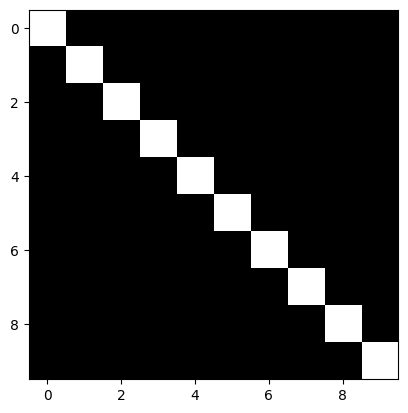

In [43]:
plt.imshow(n, cmap='gray')

In [46]:
o = torch.ones((10, 10))

In [48]:
z = torch.zeros((10, 10))

In [49]:
z

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [50]:
torch.eye(10)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [225]:
## nn
t1 = torch.rand(10, 10)
d = nn.Dropout(p=.50)

In [222]:
t1

tensor([[0.5130, 0.7152, 0.8709, 0.3323, 0.2042, 0.1139, 0.3172, 0.7565, 0.3315,
         0.8292],
        [0.1614, 0.6397, 0.8050, 0.2245, 0.3374, 0.2272, 0.9115, 0.5536, 0.7454,
         0.2701],
        [0.0359, 0.4352, 0.4700, 0.4978, 0.5348, 0.1008, 0.1694, 0.2979, 0.8720,
         0.5741],
        [0.7854, 0.7565, 0.8606, 0.2602, 0.4868, 0.6396, 0.1681, 0.5728, 0.3247,
         0.8846],
        [0.8365, 0.0269, 0.2599, 0.4153, 0.8825, 0.8099, 0.1458, 0.3494, 0.8757,
         0.7711],
        [0.3628, 0.4100, 0.4408, 0.5117, 0.2880, 0.0853, 0.6623, 0.2780, 0.1513,
         0.9855],
        [0.2048, 0.8826, 0.7474, 0.1248, 0.3582, 0.3488, 0.7757, 0.2839, 0.6572,
         0.7310],
        [0.1648, 0.9323, 0.0813, 0.6364, 0.1457, 0.0414, 0.9672, 0.2611, 0.0758,
         0.6401],
        [0.6813, 0.9976, 0.4676, 0.2125, 0.7711, 0.9144, 0.2267, 0.4684, 0.4221,
         0.1058],
        [0.9734, 0.9499, 0.4303, 0.2087, 0.9945, 0.8116, 0.5876, 0.1681, 0.2254,
         0.7578]])

In [224]:
d(t1)

tensor([[0.0000, 1.4304, 1.7419, 0.6645, 0.0000, 0.0000, 0.0000, 0.0000, 0.6629,
         0.0000],
        [0.3229, 0.0000, 0.0000, 0.0000, 0.0000, 0.4545, 0.0000, 0.0000, 1.4909,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.9956, 1.0696, 0.2016, 0.3389, 0.0000, 0.0000,
         0.0000],
        [0.0000, 1.5131, 0.0000, 0.5204, 0.9736, 1.2792, 0.0000, 1.1456, 0.0000,
         0.0000],
        [1.6730, 0.0538, 0.0000, 0.0000, 1.7650, 0.0000, 0.2916, 0.6988, 1.7515,
         1.5421],
        [0.0000, 0.8201, 0.0000, 0.0000, 0.5760, 0.1706, 1.3245, 0.5560, 0.3025,
         0.0000],
        [0.4096, 0.0000, 1.4949, 0.2497, 0.0000, 0.6977, 0.0000, 0.5679, 1.3145,
         1.4621],
        [0.3296, 1.8645, 0.0000, 0.0000, 0.0000, 0.0828, 1.9345, 0.5221, 0.0000,
         1.2802],
        [0.0000, 1.9951, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2116],
        [0.0000, 0.0000, 0.0000, 0.4175, 1.9891, 0.0000, 0.0000, 0.0000, 0.4509,
         0.0000]])

In [126]:
k = 1 / (1 - .5)

In [127]:
k

2.0

In [128]:
0.5473*2, 0.8288*2, 0.9615*2

(1.0946, 1.6576, 1.923)

In [129]:
t1d = t1.unsqueeze(0).unsqueeze(0).clone().detach()
t2d = t1.unsqueeze(0).unsqueeze(0).clone().detach()

In [200]:
t12 = torch.column_stack((t1d, t2d))

In [201]:
t12 = t12.clone().detach()

In [202]:
t13 = t12.clone().detach().squeeze()

In [203]:
t13.shape

torch.Size([2, 8, 8])

In [180]:
t12.shape

torch.Size([1, 2, 8, 8])

In [181]:
t1d.shape

torch.Size([1, 1, 8, 8])

In [204]:
m = nn.Dropout1d(p=0.50)

In [205]:
m

Dropout1d(p=0.5, inplace=False)

In [ ]:
## forward =>  __call__()

In [206]:
m2 = m(t13)

In [207]:
m2

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.3324, 1.5402, 0.1077, 0.6394, 0.8962, 0.6196, 1.0837, 1.7591],
         [1.8537, 0.0751, 1.0980, 0.3911, 0.7586, 0.4804, 0.6934, 0.4517],
         [1.5290, 1.1432, 1.7224, 1.2094, 0.1907, 1.9332, 0.2783, 0.2709]],

        [[0.6463, 0.3125, 0.9787, 1.0725, 1.0707, 0.7716, 1.1336, 0.5600],
         [0.3989, 1.9588, 0.4075, 0.8432, 0.4353, 1.9093, 0.4914, 1.8998],
         [1.3730, 0.9991, 1.8692, 1.5935, 0.7600, 1.0777, 0.9981, 1.1337],
         [0.5194, 0.7436, 1.6062, 0.7516, 0.7900, 1.7678, 0.3413, 0.5625],
         [0.2120, 1.4464, 1.7058, 0.5403, 1.1585, 1.1275, 0.8800, 0.9706],
         [0.3324, 1.540

In [155]:
torch.isclose(m2, torch.tensor(0,dtype=torch.float32))

tensor([[[[False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False]]],


        [[[False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False],
          [False, False, False, False, False, False, False, False],
          [False, False, False, False, False

In [ ]:
class Drop(nn.Module):

    def __init__(self, x):
        super().__init__()
        self.x = x

    def forward(self, dropout=.25):
        return nn.Dropout(self.x, dropout)
    ## this is wrong and will never work

## Rules:
# Inputs must go to forward()
# Layers / hyperparameters go in __init__()
# example fails because it violates both rules and misuses nn.Dropout.

## So we will fix this by doing this

class Drop(nn.Module):
    def __init__(self, p=0.25):
        super().__init__()
        self.dropout = nn.Dropout(p)

    def forward(self, x):
        return self.dropout(x)

In [ ]:
x = np.array([1,2,3,4,5,6])

In [210]:
k = np.array([1,2,3])

In [213]:
xt = torch.tensor(x).clone().detach()
kt = torch.tensor(k).clone().detach()

In [216]:
np.convolve?

Signature:       np.convolve(a, v, mode='full')
Call signature:  np.convolve(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function convolve at 0x000001E4ACD622A0>
File:            d:\learning_pytorch\pytorch_session\pytorch_sessions\.venv\lib\site-packages\numpy\_core\numeric.py
Docstring:      
Returns the discrete, linear convolution of two one-dimensional sequences.

The convolution operator is often seen in signal processing, where it
models the effect of a linear time-invariant system on a signal [1]_.  In
probability theory, the sum of two independent random variables is
distributed according to the convolution of their individual
distributions.

If `v` is longer than `a`, the arrays are swapped before computation.

Parameters
----------
a : (N,) array_like
    First one-dimensional input array.
v : (M,) array_like
    Second one-dimensional input array.
mode : {'full', 'valid', 'same'}, optional
    'full':
      By default, mode is 'full'.  This 

In [ ]:
np.convolve(x, k, 'valid') ## correct

array([10, 16, 22, 28])

In [215]:
np.convolve(x, k[::-1], 'valid')

array([14, 20, 26, 32])

In [ ]:
torch.conv1d(xt.reshape(1, 1, -1), kt.reshape(1,1,-1)) ## cross correlation

tensor([[[14, 20, 26, 32]]])

In [ ]:
## x*k[n-k] ## convolution
## x*k[n+k] ## cross correlation
## kernel trick :=> svm
torch.tensor([1,2,3]) @ torch.tensor([1,2,3])

tensor(14)

In [219]:
torch.tensor([2,3,4]) @ torch.tensor([1,2,3])

tensor(20)

In [220]:
torch.tensor([3,4,5]) @ torch.tensor([1,2,3])

tensor(26)

In [ ]:
## FFT => Fast Fourier Transform
## Frequency Space
## convolution / element wise multiplication => beyond my brain ()
## How convolution works in frequency space (with pure maths)

## MaxPool
## BatchNorm ( scale, shift, rolling mean, rolling std)

## 

## softmax , f1 score => numerically unstable, normalise
## dropuut => scale => inference => weights same scale
## confusion => droput => element wise => 1 whole tensor , 1 row per matrix
## convolution => x*h[n-k](convolution/numpy) vs x*h[n+k] (cross correlation/pytorch)
## convolution => implement => FFT (theory) => math (way too difficult)
## convolution => kernel (learnable: trainable)
## class pytorch => init (hyperparameter mention, trainable / untrainable , never mention data)
## forward() only keeps data 

## In future we will implement the following
## iris  (stdardize the data using batchnorm etc, then followed by some augmentation - details later)
## mnist (deep learning)
## 
## Try implementing the convolution at your end
## convolution (pure python / fold unfold in pytorch)